In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('breast-cancer-data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.value_counts

<bound method DataFrame.value_counts of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92   

In [7]:
dummy=pd.get_dummies(df['diagnosis'])

In [8]:
del dummy['B']

In [9]:
dummy

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [10]:
## The id value is not impact on data so we drop it.
df.drop(['id', 'diagnosis'], axis = 1,inplace=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# for model buliding more number of columns may lead to multicollinearity so we need to use Dimensional reduction using PCA
data=pd.concat([dummy,df], axis = 1)
data.head()

,M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
Total = data.isnull().sum().sort_values(ascending=False)          

Percent = (data.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
M,0,NaN
compactness_se,0,0.0
symmetry_worst,0,0.0
concave points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0


In [13]:
# Standardize data: better pratice will remove skewness of data
# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(df)

# print the dimension of the standardized data
print(data_std.shape)

(569, 30)


In [14]:
data_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
# generate the covariance matrix using 'cov' function
# consider the transpose of the dataframe 'df_attr_std' to obtain the covarinace between the independent variables (columns)  
cov_mat = np.cov(data_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151  0.50701464
   0.67795504  0.82397664  0.14800135 -0.31217947  0.68028597 -0.09748878
   0.67535854  0.7371592  -0.22299203  0.20636266  0.19454553  0.37683123
  -0.10450454 -0.04271634  0.97124591  0.29753054  0.9668357   0.94273929
   0.11982673  0.41419075  0.52783912  0.74552443  0.16424199  0.00707833]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969  0.23711895
   0.30295025  0.29398071  0.07152669 -0.07657176  0.27635436  0.38703783
   0.28216902  0.26030246  0.00662542  0.19231259  0.14354535  0.1641395
   0.00914324  0.0545534   0.35319367  0.9136503   0.35866993  0.34415078
   0.07763981  0.27831873  0.3015552   0.29583577  0.10519278  0.11941522]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309  0.55791673
   0.71739645  0.85247524  0.18334944 -0.26193725  0.69298291 -0.08691383
   0.6943552   0.74629428 -0.20305088  0.25118513  0.2284839   0.40793385
  -0.08177304 -0.00553312  0.97118319

In [16]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02] 

Eigenvectors: 
 
 [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03

In [17]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[13.304990794374572, 5.701374603726148, 2.8229101550062303, 1.9841275177301971, 1.6516332423301194, 1.2094822398029725, 0.6764088817009039, 0.47745625468950775, 0.4176287821078168, 0.35131087488173257, 0.2944331534911645, 0.26162116136612024, 0.24178242132831396, 0.1572861492175933, 0.09430069560105614, 0.08000340447737687, 0.059503613530431855, 0.052711422210148046, 0.0495647002129816, 0.031214260553066638, 0.03002566309042841, 0.02748771133890448, 0.024383691354591314, 0.018086793984305335, 0.015508527134418623, 0.008192037117607083, 0.00691261257918436, 0.001592136001197178, 0.0007501214127192695, 0.00013327905666378703]


In [18]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[44.27202560752637,
 18.971182044033096,
 9.393163257431388,
 6.60213491547013,
 5.495768492346264,
 4.024522039883351,
 2.2507337129825022,
 1.5887238000213255,
 1.3896493745591083,
 1.1689781894131457,
 0.9797189875980159,
 0.8705379007378805,
 0.8045249871967326,
 0.5233657454926358,
 0.3137832167627408,
 0.26620933651523165,
 0.1979967925324269,
 0.1753959450226366,
 0.1649253059225163,
 0.10386467483387135,
 0.09990964637002535,
 0.09146467510543488,
 0.08113612588991129,
 0.06018335666716711,
 0.05160423791651888,
 0.027258799547749388,
 0.023001546250595865,
 0.00529779290380783,
 0.0024960103246897763,
 0.00044348274273597535]

### choosing two pc value

In [19]:
eigenvector = eig_vec[:,[0,1]]

# print the vectors
eigenvector

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302],
       [ 0.23928535,  0.15189161],
       [ 0.25840048,  0.06016536],
       [ 0.26085376, -0.0347675 ],
       [ 0.13816696,  0.19034877],
       [ 0.06436335,  0.36657547],
       [ 0.20597878, -0.10555215],
       [ 0.01742803,  0.08997968],
       [ 0.21132592, -0.08945723],
       [ 0.20286964, -0.15229263],
       [ 0.01453145,  0.20443045],
       [ 0.17039345,  0.2327159 ],
       [ 0.15358979,  0.19720728],
       [ 0.1834174 ,  0.13032156],
       [ 0.04249842,  0.183848  ],
       [ 0.10256832,  0.28009203],
       [ 0.22799663, -0.21986638],
       [ 0.10446933, -0.0454673 ],
       [ 0.23663968, -0.19987843],
       [ 0.22487053, -0.21935186],
       [ 0.12795256,  0.17230435],
       [ 0.21009588,  0.14359317],
       [ 0.22876753,  0.09796411],
       [ 0.25088597, -0.00825724],
       [ 0.12290456,

In [20]:
df_pca=pd.DataFrame(data_std.dot(eigenvector),columns=['PC1','PC2'])
df_pca

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


### pca using python library

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=10)
components=pca.fit_transform(data_std)
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca_sklearn.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [22]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0, 0.5, 'Target Variable')

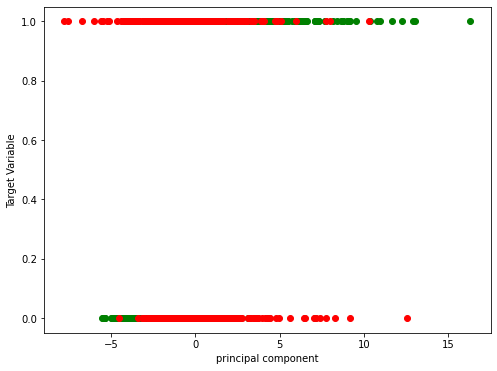

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'],data['M'],color='green')
plt.scatter(df_pca['PC2'],data['M'],color='red')
plt.xlabel('principal component')
plt.ylabel('Target Variable')

Text(0, 0.5, 'Second Principal Component')

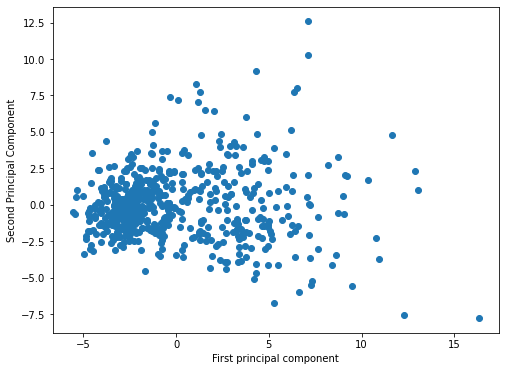

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'],df_pca['PC2'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [25]:
X=df_pca
y=data['M']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree=dtree.predict(X_test)
print('Confusion Matrix:','\n',confusion_matrix(y_test,pred_dtree))
print('\n')
print('Classification Report:','\n',classification_report(y_test,pred_dtree))

Confusion Matrix: 
 [[60  7]
 [ 2 45]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        67
           1       0.87      0.96      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



### choosing three pc value

In [27]:
eig_vect = eig_vec[:,[0,1,2]]

# print the vectors
eig_vect

array([[ 0.21890244, -0.23385713, -0.00853124],
       [ 0.10372458, -0.05970609,  0.0645499 ],
       [ 0.22753729, -0.21518136, -0.00931422],
       [ 0.22099499, -0.23107671,  0.02869953],
       [ 0.14258969,  0.18611302, -0.1042919 ],
       [ 0.23928535,  0.15189161, -0.07409157],
       [ 0.25840048,  0.06016536,  0.00273384],
       [ 0.26085376, -0.0347675 , -0.02556354],
       [ 0.13816696,  0.19034877, -0.04023994],
       [ 0.06436335,  0.36657547, -0.02257409],
       [ 0.20597878, -0.10555215,  0.26848139],
       [ 0.01742803,  0.08997968,  0.37463367],
       [ 0.21132592, -0.08945723,  0.26664537],
       [ 0.20286964, -0.15229263,  0.21600653],
       [ 0.01453145,  0.20443045,  0.30883898],
       [ 0.17039345,  0.2327159 ,  0.15477972],
       [ 0.15358979,  0.19720728,  0.17646374],
       [ 0.1834174 ,  0.13032156,  0.22465757],
       [ 0.04249842,  0.183848  ,  0.28858429],
       [ 0.10256832,  0.28009203,  0.21150376],
       [ 0.22799663, -0.21986638, -0.047

In [28]:
df_pca1=pd.DataFrame(data_std.dot(eig_vect),columns=['PC1','PC2','PC3'])
df_pca1.head()

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767


In [29]:
pca=PCA(n_components=3,random_state=10)
components=pca.fit_transform(data_std)
df_pca_sklearn1 = pd.DataFrame(data = components, columns = ['PC1', 'PC2','PC3'])

# head() to display top five rows of the transformed data
df_pca_sklearn1.head()

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123169
1,2.387802,-3.768172,-0.529295
2,5.733896,-1.075174,-0.551746
3,7.122953,10.275589,-3.232791
4,3.935302,-1.948072,1.389765


In [30]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853123,  0.06454989, -0.00931421,  0.02869952, -0.10429182,
        -0.07409158,  0.00273381, -0.02556357, -0

Text(0, 0.5, 'Second Principal Component')

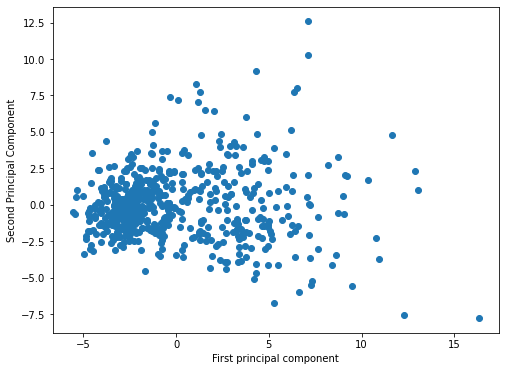

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca1['PC1'],df_pca1['PC2'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

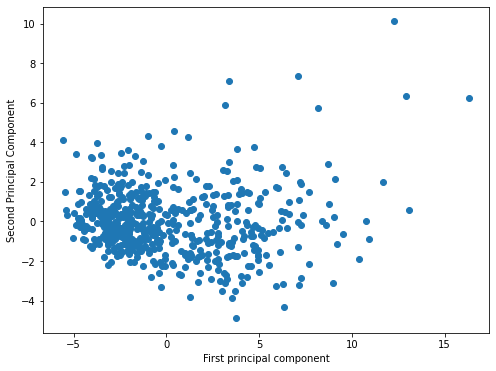

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca1['PC1'],df_pca1['PC3'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

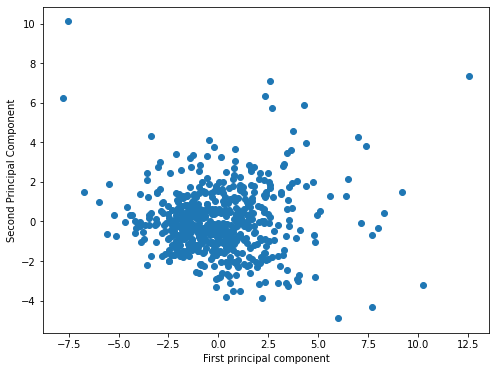

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca1['PC2'],df_pca1['PC3'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Target Variable')

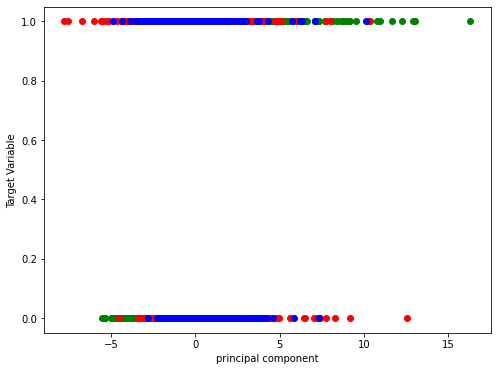

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca1['PC1'],data['M'],color='green')
plt.scatter(df_pca1['PC2'],data['M'],color='red')
plt.scatter(df_pca1['PC3'],data['M'],color='b')
plt.xlabel('principal component')
plt.ylabel('Target Variable')

In [35]:
X=df_pca1
y=data['M']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree=dtree.predict(X_test)
print('Confusion Matrix:','\n',confusion_matrix(y_test,pred_dtree))
print('\n')
print('Classification Report:','\n',classification_report(y_test,pred_dtree))

Confusion Matrix: 
 [[60  7]
 [ 4 43]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        67
           1       0.86      0.91      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



#### By using three number of pca accuarcy level 2% decreases